In [8]:
import os
import re
import datetime
from mordred import Calculator, descriptors
from rdkit import Chem
import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
import sys
import torch
sys.path.append('/home/ianlee/JTVAE/JTVAE/CPU-P3')
from fast_jtnn import *

vocab_path = '/home/ianlee/JTVAE/Ian_train/Vocabulary/smi_vocab-2.txt'
model_path = '/home/ianlee/JTVAE/Ian_train/Train/MODEL-TRAIN-3/model.epoch-39'

# Load vocabulary
vocab = [x.strip("\r\n ") for x in open(vocab_path)]
vocab = Vocab(vocab)

# Initial Step for VAE
vae_model = JTNNVAE(vocab, hidden_size=450, latent_size=32, depthT=3, depthG=20)
vae_model.load_state_dict(torch.load(model_path, map_location='cpu'))
vae_model.cpu()
vae_model.eval()

feature_list =['Temp_C', 'Concentration']
methods = ['ABC','PSO','Random']


ABC = []
PSO = []
Random = []

# 讀取 data1.csv 到 data10.csv
for method in methods:
    if method == 'ABC':
        for i in range(10):
            filename = f"/home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/3_Make_New_Data_Predictor/{method}/round{i+1}/cycle3.csv"
            df = pd.read_csv(filename)
            ABC.append(df)
    if method =='PSO':
        for i in range(10):
            filename = f"/home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/3_Make_New_Data_Predictor/{method}/round{i+1}/cycle3.csv"
            df = pd.read_csv(filename)
            PSO.append(df)

    if method =='Random':
        for i in range(10):
            filename = f"/home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/3_Make_New_Data_Predictor/{method}/round{i+1}/cycle3.csv"
            df = pd.read_csv(filename)
            Random.append(df)

# 合併成一個大 DataFrame
ABC = pd.concat(ABC, ignore_index=True)
PSO = pd.concat(PSO, ignore_index=True)
Random = pd.concat(Random, ignore_index=True)

solvent_mordred = pd.read_csv('/home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/0_Create_Ground_Truth_Model/data/solvent_mordred.csv')
base_mordred = pd.read_csv('/home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/0_Create_Ground_Truth_Model/data/base_mordred.csv')


#latent_ABC = [vae_model.encode_latent_mean([x])[0].detach().cpu().numpy() for x in ABC['Ligand_SMILES']]
#latent_PSO = [vae_model.encode_latent_mean([x])[0].detach().cpu().numpy() for x in PSO['Ligand_SMILES']]
latent_Random = [vae_model.encode_latent_mean([x])[0].detach().cpu().numpy() for x in Random['Ligand_SMILES']]

latent_Random = np.array(latent_Random)

for i in range(latent_Random.shape[1]):
    col = latent_ABC[:, i]
    print(f"Dim {i}: min={col.min():.2e}, max={col.max():.2e}, mean={col.mean():.2e}, std={col.std():.2e}")



[13:44:39] WARNING: not removing hydrogen atom without neighbors


Dim 0: min=-1.72e+00, max=5.31e+00, mean=2.63e+00, std=1.49e+00
Dim 1: min=-4.53e+00, max=1.62e+00, mean=-1.35e+00, std=1.19e+00
Dim 2: min=-3.40e+00, max=4.05e+00, mean=5.28e-01, std=1.96e+00
Dim 3: min=-1.51e+00, max=4.05e+00, mean=1.38e+00, std=1.28e+00
Dim 4: min=-5.62e+00, max=5.46e-02, mean=-2.27e+00, std=1.43e+00
Dim 5: min=-3.51e+00, max=2.58e+00, mean=-3.12e-01, std=1.34e+00
Dim 6: min=-1.99e+00, max=3.65e+00, mean=1.22e+00, std=9.01e-01
Dim 7: min=-2.57e+00, max=3.19e+00, mean=5.22e-01, std=9.72e-01
Dim 8: min=-2.00e+00, max=3.52e+00, mean=7.19e-01, std=1.04e+00
Dim 9: min=-1.41e+00, max=3.81e+00, mean=1.29e+00, std=1.08e+00
Dim 10: min=-2.56e+00, max=4.93e+00, mean=8.57e-01, std=1.49e+00
Dim 11: min=-2.35e+00, max=3.20e+00, mean=5.09e-01, std=1.07e+00
Dim 12: min=-1.51e+00, max=4.78e+00, mean=1.67e+00, std=1.15e+00
Dim 13: min=-8.41e-01, max=4.64e+00, mean=2.15e+00, std=9.50e-01
Dim 14: min=-2.64e+00, max=6.86e+00, mean=1.88e+00, std=1.88e+00
Dim 15: min=-1.87e+00, max=3.66e

In [9]:
train_set = '/home/ianlee/JTVAE/Ian_train/Raw-Data/processed_smi.txt'
with open(train_set, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# 去除每行的換行符
lines = [line.strip() for line in lines]
latent_Random = vae_model.encode_latent_mean(lines).detach().cpu().numpy()

#latent_Random = np.array(latent_Random)

for i in range(latent_Random.shape[1]):
    col = latent_ABC[:, i]
    print(f"Dim {i}: min={col.min():.2e}, max={col.max():.2e}, mean={col.mean():.2e}, std={col.std():.2e}")


[13:59:48] WARNING: not removing hydrogen atom without neighbors
[13:59:48] WARNING: not removing hydrogen atom without neighbors
[13:59:48] WARNING: not removing hydrogen atom without neighbors


KeyError: 'C1=CC2=CSCC3=NC(=CC=C3)CSCC(=C1)[N-]2'

/tmp/ipykernel_38428/3532980834.py:1: DeprecationWarning: Accessing jsonschema.draft3_format_checker is deprecated and will be removed in a future release. Instead, use the FORMAT_CHECKER attribute on the corresponding Validator.
  from jsonschema import draft3_format_checker
/home/ianlee/anaconda3/envs/leveler2/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ianlee/anaconda3/envs/leveler2/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[0.1255 110.2134 2.449489742783178 ... -624955621376.0 -450924675072.0
  1497009225728.0]
 [0.1068 98.2955 4.87656659757667 ... -39756382208.0 -28772915200.0
  95417131008.0]
 [0.086 102.1401 2.449489742783178 ... -242543296512.0 -175266955264.0
  581536841728.0]
 ...
 [0.0796 104.2352 2.449489742783178 ... -171672092672.0 -123857633280.0
  411209334784.0]
 [0.1279 104.8927 4.87656659757667 ... -14390108160.0 -10448033792.0
  34607616000.0]
 [0.0669 105.0781 4.87656659757667 ... -210749554688.0 -151437541376.0
  503564500992.0]]
0     39.9089
1     39.8011
2     39.5519
3     38.2681
4     35.6668
5     35.6668
6     35.0503
7     35.0503
8     35.0503
9     34.6760
10    32.6965
11    32.5346
12    32.1887
13    32.1624
14    31.6046
15    30.2022
16    29.5070
17    28.7307
18    28.5892
19    19.2135
Name: yield, dtype: float64


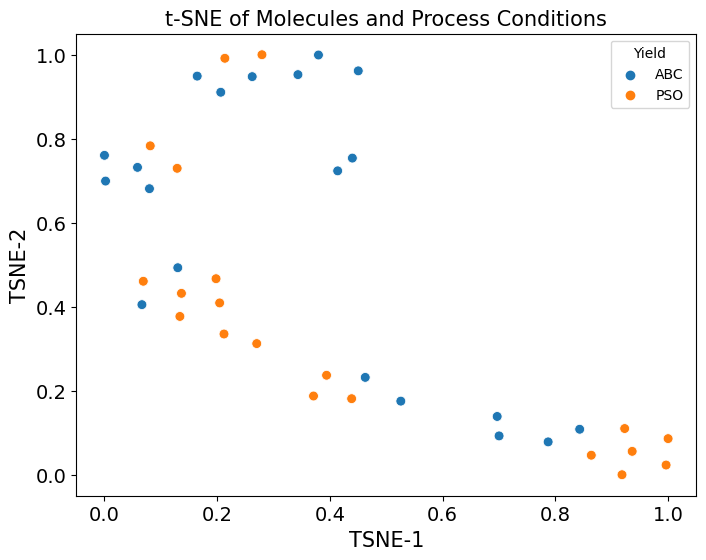

"\n# Plot the t-SNE results\nplt.figure(figsize=(8, 6))\nsns.scatterplot(x='TSNE-1', y='TSNE-2', hue = 'yield', data=df2, s=100)\nplt.yticks(fontsize=14)\nplt.xticks(fontsize=14)\nplt.title('t-SNE of Molecules and Process Conditions for PSO', fontsize=15)\nplt.xlabel('TSNE-1', fontsize = 15)\nplt.ylabel('TSNE-2', fontsize = 15)\nplt.legend(title='Yield')\nplt.show()\n"

In [75]:
from jsonschema import draft3_format_checker
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from mordred import Calculator, descriptors
from rdkit import Chem
from sklearn.preprocessing import MinMaxScaler

#first combine without latent
c_df = pd.concat([ABC, PSO], ignore_index=True)
#c_df = data2

c_df = c_df.values
c_df = np.concatenate((c_df, latent), axis=1)
#c_df = latent
print(c_df)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=8)
tsne_results = tsne.fit_transform(c_df)

# Normalize the t-SNE values
scaler = MinMaxScaler()
tsne_results_normalized = scaler.fit_transform(tsne_results)


# Add a column to indicate the dataset
ABC['dataset'] = 'ABC'
PSO['dataset'] = 'PSO'
#ABC_T['dataset'] = 'ABC_T'

ABC['yield'] = Yield.iloc[:20].values
PSO['yield'] = Yield.iloc[20:].values
#ABC_T['yield'] =Yield.iloc[20:].values

# Combine the datasets
combined_df = pd.concat([ABC, PSO], ignore_index=True)
#combined_df = data2

# Add normalized t-SNE results to the DataFrame
combined_df['TSNE-1'] = tsne_results_normalized[:, 0]
combined_df['TSNE-2'] = tsne_results_normalized[:, 1]

df1 = combined_df.iloc[:20]
df2 = combined_df.iloc[20:]
#df3 = combined_df.iloc[20:]

print(df1['yield'])


# Plot the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE-1', y='TSNE-2', hue = 'dataset', data=combined_df, s=50)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('t-SNE of Molecules and Process Conditions', fontsize=15)
plt.xlabel('TSNE-1', fontsize = 15)
plt.ylabel('TSNE-2', fontsize = 15)
plt.legend(title='Yield')
plt.show()

"""
# Plot the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE-1', y='TSNE-2', hue = 'yield', data=df2, s=100)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('t-SNE of Molecules and Process Conditions for PSO', fontsize=15)
plt.xlabel('TSNE-1', fontsize = 15)
plt.ylabel('TSNE-2', fontsize = 15)
plt.legend(title='Yield')
plt.show()
"""

160                            CC(C)CC1CCCCC12C[NH+]=CN2
161                     Cc1ncsc1C1C[NH2+]C(=Nc2ccncc2)C1
162    CCc1onc(-c2ncnc3c2cnc2ncc(-c4ccnc(OCC(C)C)c4)n...
163                        CC(C)(C)OC1NC=[NH+]C1C1CCOCC1
164                                 CC1(C)CNCCNCCCNCCNC1
                             ...                        
355                   Cc1cc(O)nc2c1C(c1cncs1)Oc1ccccc1-2
356               Cc1ccnc(C=NN2c3ccccc3NC23CNC=[NH+]3)c1
357                      CC(C)N1CCNCCNC(CCN)c2cccc(n2)C1
358                             COC(=O)C1=CC(=O)C(C)N=C1
359               CCc1c(N2C(c3ccccc3)=Nc3ccccc3C2O)noc1C
Name: SMILES, Length: 200, dtype: object


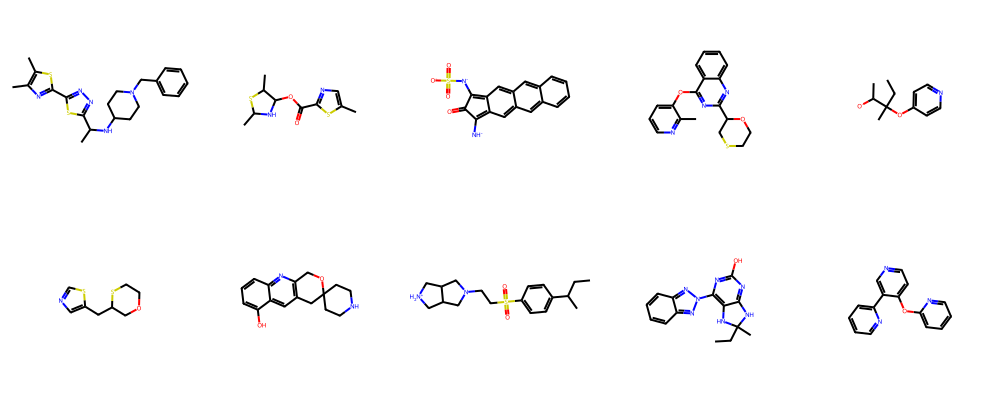

In [135]:
# print the top 10 molecules
# Sort the DataFrame by the 'crystal_size' column in ascending order
from rdkit import Chem
from rdkit.Chem import Draw

data10 = pd.read_csv(data_path10)
data5 = pd.read_csv(data_path5)
data2 = pd.read_csv(data_path2)

data10 , data5, data2 = data10.iloc[160:],data5.iloc[160:],data2.iloc[160:]

print(data10['SMILES'])
data10_df_sorted = data10.sort_values(by='crystal_size', ascending=True)
data5_df_sorted = data5.sort_values(by='crystal_size', ascending=True)
data2_df_sorted = data2.sort_values(by='crystal_size', ascending=True)
mol10 = [Chem.MolFromSmiles(smiles) for smiles in data10_df_sorted['SMILES'].head(10)]
mol5 = [Chem.MolFromSmiles(smiles) for smiles in data5_df_sorted['SMILES'].head(10)]
mol2 = [Chem.MolFromSmiles(smiles) for smiles in data2_df_sorted['SMILES'].head(10)]

# Generate molecule images
img1 = Draw.MolsToGridImage(mol10, molsPerRow=5, subImgSize=(200, 200)) #, legends=data10_df_sorted['SMILES'])
img2 = Draw.MolsToGridImage(mol5, molsPerRow=5, subImgSize=(200, 200)) #, legends=data5_df_sorted['SMILES'])
img3 = Draw.MolsToGridImage(mol2, molsPerRow=5, subImgSize=(200, 200)) #, legends=data2_df_sorted['SMILES'])
img1
#img2
#img3

['c1ccc(-c2ccc(C3=NCCO3)nc2)nc1', 'Cc1ccnc(-c2cnc3sccc3c2)c1', 'Cc1ccnc(CNC2C=CCCC2)c1', 'CC(N)c1cccnc1-c1ccccn1', 'OCc1cccnc1-c1ccccn1', 'Cc1ccncc1-c1ccncc1', 'Cc1ccnc(COc2cc(C)n[nH]2)c1', 'Cc1c(C2CCCCC2)nc2ccccc2c1C', 'CCc1ccnc(C(=O)O)c1', 'Cc1cc2c(-c3cccnn3)ccnc2cc1[O-]', 'CC1CC=C2N=CC=C(C(C)N)C2O1', 'Cc1ccncc1Cc1nc([NH-])nc2ccsc12', 'Cc1cnc(CO)cc1C', 'Cc1ccnc2cncc(-c3cn[nH]c3)c12']


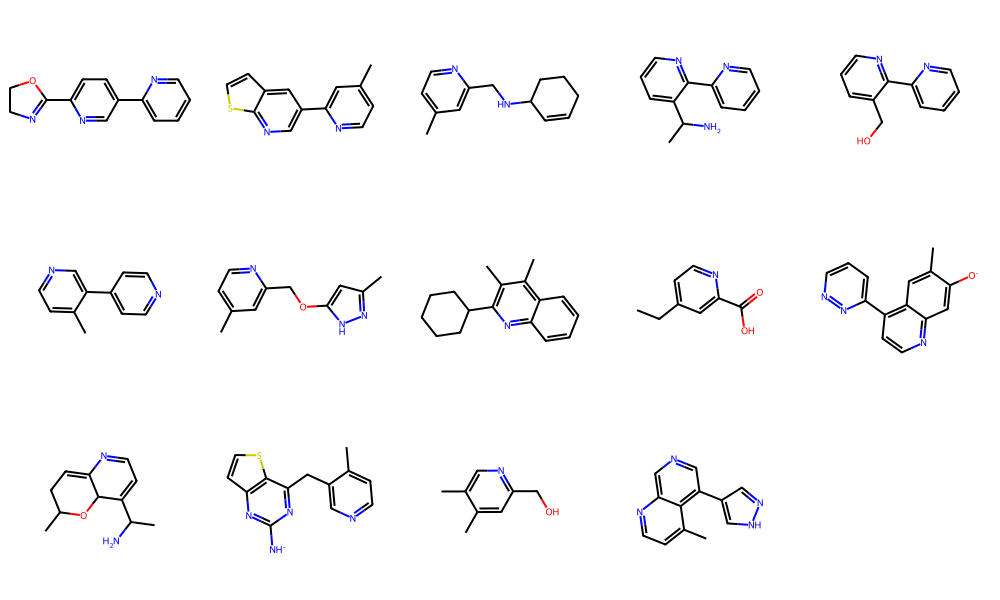

In [23]:
# initial smiles
# print the top 10 molecules
# Sort the DataFrame by the 'crystal_size' column in ascending order
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd

data10 = pd.read_csv('/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/3_Make_New_Data_Predictor/ABC/cycle0.csv')

smiles = list(set(data10['SMILES'].tolist()))
print(smiles)
mol = [Chem.MolFromSmiles(smiles) for smiles in smiles]
img1 = Draw.MolsToGridImage(mol, molsPerRow=5, subImgSize=(200, 200))
img1